<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Осень 2020</b></h3>


В этой домашке вы напишите свой класс логистической регрессии для многоклассовой классификации, а также логистическую регрессию с регуляризацией.

In [1]:
import numpy as np
import pandas as pd
import scipy.linalg as sla
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [2]:
np.random.seed(42)

### 1. Градиентный спуск: повторение

Рассмотрим функцию от двух переменных:

In [3]:
def f(x):
  """
  :param x: np.array(np.float) размерности 2
  :return: np.float
  """
  return np.sum(np.sin(x)**2, axis=0)

Обратите внимание, что $x$ - numpy-array размерности 2.

***Reminder:***  
Что мы хотим? Мы хотим найти минимум этой функции (в машинному обучении мы обычно хотим найти минимум **функции потерь**, например, MSE), а точнее найти $x_1$ и $x_2$ такие, что при них значение $f(x_1,x_2)$ минимально, то есть *точку экстремума*.  
  
Как мы будем искать эту точку? Используем методы оптимизации (в нашем случае - *минимизации*). Одним из таких методов и является **градиентный спуск**. 

Реализуем функцию, которая будет осуществлять градиентный спуск для функции $f$:

*Примечание:* Вам нужно посчитать частные производные именно **аналитически** и **переписать их в код**, а не считать производные численно (через отношение приращения функции к приращению аргумента) -- в этих двух случаях могут различаться ответы, поэтому будьте внимательны.

In [6]:
def grad_f(x): 
    """
    Градиент функциии f, определенной выше.
    :param x: np.array(np.float) размерности 2
    :return: np.array(np.float) размерности 2
    """
    return 2 * np.sin(x) * np.cos(x)

In [7]:
def grad_descent_2d(f, grad_f, lr, num_iter=100, x0=None):
    """
    функция, которая реализует градиентный спуск в минимум для функции f от двух переменных. 
        :param f: скалярная функция двух переменных
        :param grad_f: градиент функции f (вектор размерности 2)
        :param lr: learning rate алгоритма
        :param num_iter: количество итераций градиентного спуска
        :return: np.array пар вида (x, f(x))
    """
    if x0 is None:
        x0 = np.random.random(2)
    
    # будем сохранять значения аргументов и значений функции 
    # в процессе град. спуска в переменную history
    history = []
    
    # итерация цикла -- шаг градиентнго спуска
    curr_x = x0.copy()
    for iter_num in range(num_iter):
        entry = np.hstack((curr_x, f(curr_x)))
        history.append(entry)
        # обновте curr_x
        curr_x -= lr * grad_f(curr_x)
        
    return np.vstack(history)

In [8]:
steps = grad_descent_2d(f, grad_f, lr=0.1, num_iter=20)

In [12]:
print(steps)

[[3.74540119e-01 9.50714306e-01 7.96162814e-01]
 [3.06443570e-01 8.56130580e-01 6.61501405e-01]
 [2.48920419e-01 7.57129527e-01 5.32438585e-01]
 [2.01167461e-01 6.57289308e-01 4.13213611e-01]
 [1.62010673e-01 5.60553766e-01 3.08675973e-01]
 [1.30172552e-01 4.70495524e-01 2.22355696e-01]
 [1.04431147e-01 3.89681303e-01 1.55185446e-01]
 [8.36964420e-02 3.19398688e-01 1.05582063e-01]
 [6.70352177e-02 2.59775649e-01 7.04659717e-02]
 [5.36683031e-02 2.10126580e-01 4.63846811e-02]
 [4.29552413e-02 1.69327420e-01 3.02428152e-02]
 [3.43747570e-02 1.36105556e-01 1.95917748e-02]
 [2.75052200e-02 1.09219378e-01 1.26378615e-02]
 [2.20069501e-02 8.75488032e-02 8.12945761e-03]
 [1.76069810e-02 7.01283780e-02 5.21990623e-03]
 [1.40863125e-02 5.61486426e-02 3.34776943e-03]
 [1.12694227e-02 4.49425016e-02 2.14546343e-03]
 [9.01572898e-03 3.59660999e-02 1.37428384e-03]
 [7.21268090e-03 2.87790816e-02 8.80028766e-04]
 [5.77019475e-03 2.30264428e-02 5.63418144e-04]]


Визуализируем точки градиентного спуска на 3D-графике нашей функции. Звездочками будут обозначены точки (тройки $x_1, x_2, f(x_1, x_2)$), по которым Ваш алгоритм градиентного спуска двигался к минимуму.

(Для того, чтобы написовать этот график, мы и сохраняли значения $cur\_x_1, cur\_x_2, f(cur\_x_1, cur\_x_2)$ в `steps` в процессе спуска)

Если у Вас правильно написана функция `grad_descent_2d`, то звездочки на картинке должны сходиться к одной из точку минимума функции. Вы можете менять начальные приближения алгоритма, значения `lr` и `num_iter` и получать разные результаты.

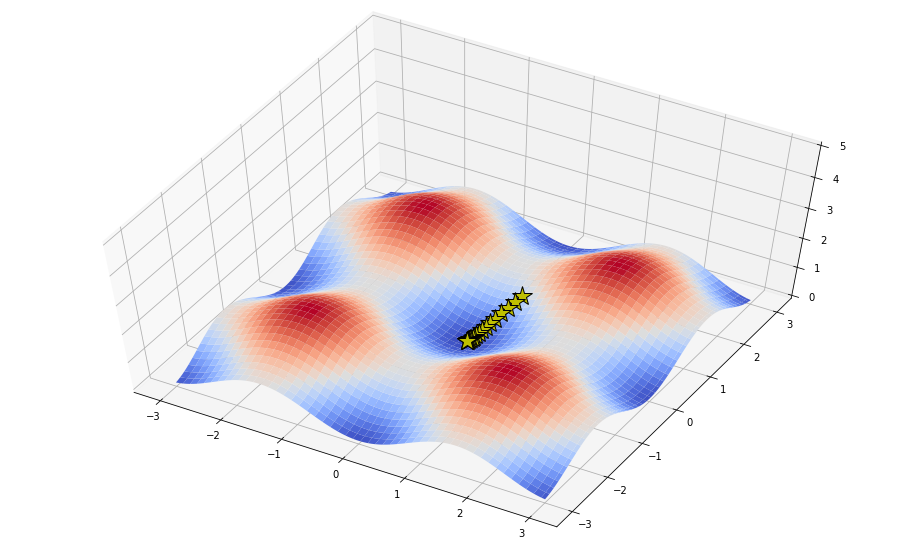

In [9]:
# %matplotlib osx

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

path = []

X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, f([X, Y]), cmap=cm.coolwarm, zorder=2)

ax.plot(xs=steps[:, 0], ys=steps[:, 1], zs=steps[:, 2],
        marker='*', markersize=20, zorder=3, 
        markerfacecolor='y', lw=3, c='black')

ax.set_zlim(0, 5)
ax.view_init(elev=60)
plt.show()

Посмотрим на график значений функции от шага

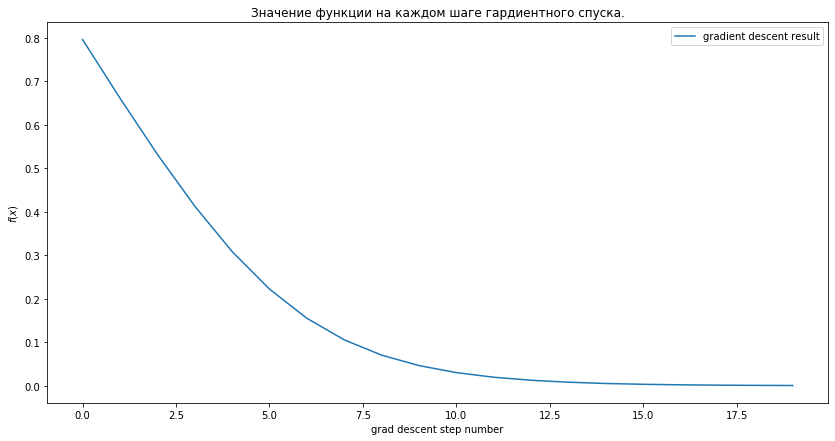

In [10]:
plt.figure(figsize=(14,7))
plt.xlabel('grad descent step number')
plt.ylabel('$f(x)$')
plt.title('Значение функции на каждом шаге гардиентного спуска.')

f_values = list(map(lambda x: x[2], steps))
plt.plot(f_values, label='gradient descent result')
plt.legend()

Когда вы используете градиентный спуск всегда нужно проверять, сошелся ли он. К сожалению для большинства моделей не получится построить 3D график, поэтому обязательно нужно смотреть на то, как менялся лосс на каждом шаге градиентного спуска.

# 2. Генератор батчей

Обычно генерация батчей отличается от той, которую мы использовали в семинаре. Мы выбирали *batch_size* случайных строчек на каждом шаге, но у такого подхода есть минусы. Основной заключается в том, что некоторые строчки из обучающего датасета могут попадаться значительно реже, чем другие. 

Чтобы это исправить обучение делят на эпохи. Мы хотим, чтобы в течение одной эпохи модель обучилась на каждом примере один раз. Для этого нужно перемешать строчки в датасете и каждый раз брать очередные *batch_size* строчек. 

Может так получится, что размер датасета не делится на *batch_size*, тогда последний батч будет состоять из нескольких последних строк и его размер будет меньше, чем *batch_size*. Такой батч иногда выкидывают и просто не используют. Именно так вам нужно поступить в этом задании.

Напишите генератор батчей, который будет принимать на вход признаки, ответы и размер батча. Генератор должен возвращать tuple из ($X_{batch}$, $y_{batch}$). Если размер датасета не делится на batch_size, то последний маленький батч возвращать не нужно. 

Подробнее про Python генераторы можно прочитать здесь:

[Документация](https://wiki.python.org/moin/Generators)

[Описание на русском](https://pythoner.name/list-generator)

Чтобы не перемешивать сам датасет воспользуйтесь np.random.permutation(len(X))


In [46]:
from itertools import zip_longest

def grouper(iterable, n, fillvalue=None):
    args = [iter(iterable)] * n
    print(args)
    return zip_longest(*args, fillvalue=None)
list(grouper('ABCDEFG', 3, 'x'))

[<str_iterator object at 0x118d84160>, <str_iterator object at 0x118d84160>, <str_iterator object at 0x118d84160>]


[('A', 'B', 'C'), ('D', 'E', 'F'), ('G', None, None)]

In [39]:
def generate_batches(X, y, batch_size):
    assert len(X) == len(y)
    np.random.seed(42)
    X = np.array(X)
    y = np.array(y)
    perm = np.random.permutation(len(X))
    for batch_idx in range(len(X) // batch_size):
        yield (X[perm[: batch_size]], y[perm[: batch_size]])
        perm = perm[batch_size : ]

Проверим, что наш генератор батчей премешивает датасет и каждый эелмент встречается один раз:

In [40]:
X_fake = np.arange(100)[:, np.newaxis]
y_fake = np.arange(100) + 1000

X_reconstructed, y_reconstructed = [], []
for X_batch, y_batch in generate_batches(X_fake, y_fake, 10):
    X_reconstructed.append(X_batch)
    y_reconstructed.append(y_batch)

X_reconstructed = np.concatenate(X_reconstructed)
y_reconstructed = np.concatenate(y_reconstructed)

assert (X_fake != X_reconstructed).all()
assert (y_fake != y_reconstructed).all()

assert (np.sort(X_reconstructed, axis=0) == X_fake).all

Попробуем теперь *batch_size* не делящий размер датасета.

In [41]:
X_fake = np.arange(100)[:, np.newaxis]
y_fake = np.arange(100) + 1000

num_batches = 0
for X_batch, y_batch in generate_batches(X_fake, y_fake, 7):
    num_batches += 1

print(num_batches, len(X_fake) // 7)
assert num_batches == len(X_fake) // 7

14 14


# 3. Логистическая регрессия с $l_1$ и $l_2$ регуляризацией. (elastic net)

Ваша задача -- написать класс логистической регрессии с обеими ругеляризациями и потимизацией с помощью SGD, используя генератор батчей, который вы написали выше.


In [148]:
def generate_batches(X, y, batch_size):
    assert len(X) == len(y)
    np.random.seed(42)
    X = np.array(X)
    y = np.array(y)
    perm = np.random.permutation(len(X))
    for batch_idx in range(len(X) // batch_size):
        yield (X[perm[: batch_size]], y[perm[: batch_size]])
        perm = perm[batch_size : ]

def logit(x, w):
    return np.dot(x, w)

def sigmoid(h):
    return 1. / (1 + np.exp(-h))

def soft_sign(x, eps=1e-7): 
    if abs(x) > eps:
        return np.sign(x)
    return x / eps

np_soft_sign = np.vectorize(soft_sign)

class MyElasticLogisticRegression(object):
    def __init__(self, l1_coef, l2_coef):
        self.l1_coef = l1_coef
        self.l2_coef = l2_coef
        self.w = None
    
    def fit(self, X, y, epochs=10, lr=0.1, batch_size=100):
        n, k = X.shape        
        if self.w is None:
            np.random.seed(42)
            self.w = np.random.randn(k + 1)

        X_train = np.concatenate((np.ones((n, 1)), X), axis=1)
        
        # Положите в лист losses лосс на каждом батче. Не нужно усреднять лосс по эпохе.
        losses = []
        for epoch in range(epochs): 
            for (X_batch, y_batch) in generate_batches(X_train, y, batch_size):
                self.w -= lr * self.get_grad(X_batch, y_batch, self.predict_proba(X_batch[:, 1:]))
                losses.append(self.__loss(y, self.predict_proba(X)))
        return losses
    
    def get_grad(self, X_batch, y_batch, predictions):
        """
        Принимает на вход X_batch с уже добавленной колонкой единиц. 
        НЕ НУЖНО РЕГУЛЯРИЗИРОВАТЬ BIAS.
        """
        n_samples = X_batch.shape[0]
        grad = 2 * self.l2_coef * self.w #+ self.l1_coef * np_soft_sign(self.w)
        grad[0] = 0
        grad += (predictions - y_batch) @ X_batch / n_samples
        return grad
        
    def predict_proba(self, X):
        n, k = X.shape
        X_ = np.concatenate((np.ones((n, 1)), X), axis=1)
        
        return sigmoid(logit(X_, self.w))

    def predict(self, X, threshold=0.5):
        return self.predict_proba(X) >= threshold
    
    def get_weights(self):
        return self .w
      
    def __loss(self, y, p):
        n_samples = y.shape[0]
        p = np.clip(p, 1e-10, 1 - 1e-10)
        loss = self.l2_coef * self.w ** 2 + self.l1_coef * np.abs(self.w)
        loss[0] = 0
        loss = np.sum(loss)
        loss += -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))
        return loss

Протестируем на искусственных данных:


(1000, 2) (1000,)


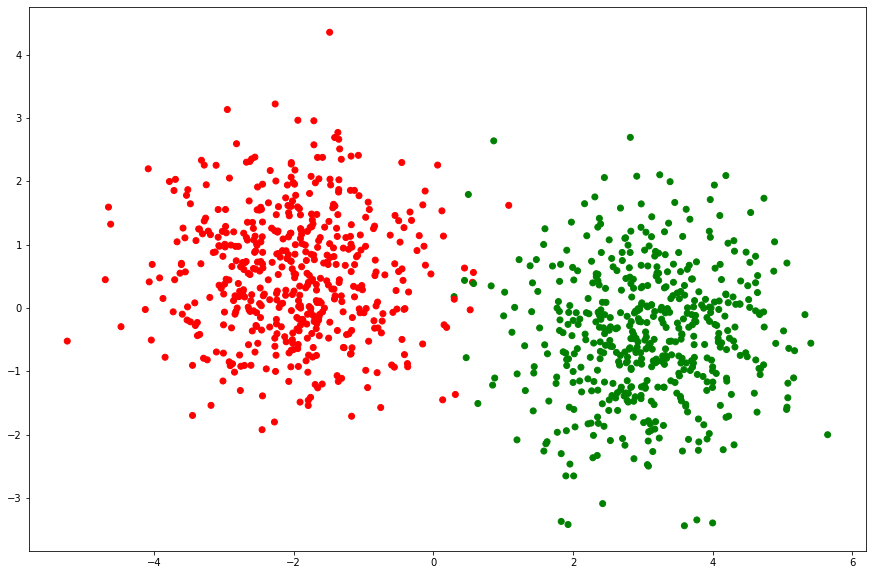

In [149]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=[[-2,0.5],[3,-0.5]], cluster_std=1, random_state=42)
print(X.shape, y.shape)
colors = ("red", "green")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y == cl] = str(colors[i])
    
plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

In [150]:
clf = MyElasticLogisticRegression(0.1, 0.1)
losses = clf.fit(X, y, epochs=1000, lr=0.1)
w = clf.get_weights()
print(losses[-10 : ])

[0.31876515006239753, 0.3189719354239662, 0.3187642596381681, 0.3188608674948942, 0.31886326328626474, 0.31861711267105447, 0.31869545031908425, 0.3186868757847333, 0.31878520098774854, 0.31890592412277535]


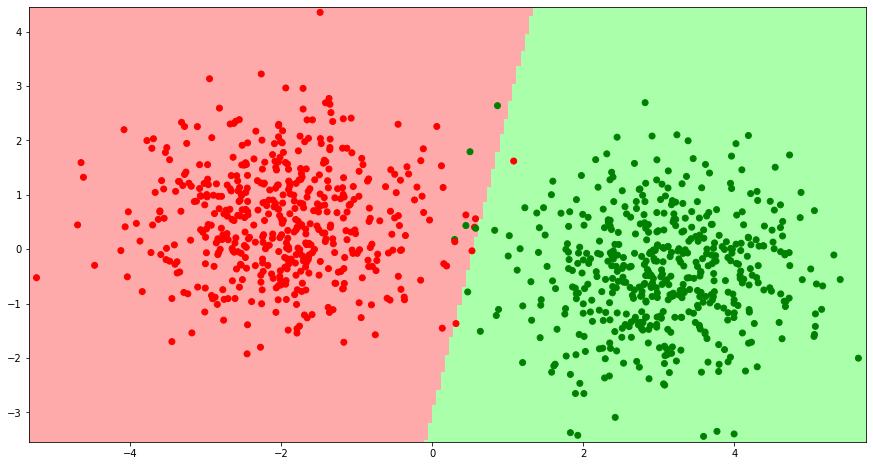

In [151]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]) - eps, np.max(X[:,0]) + eps, 200),
                     np.linspace(np.min(X[:,1]) - eps, np.max(X[:,1]) + eps, 200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=colored_y)

Теперь протестируем на датасете MNIST. Это очень простой класический датасет, на котором часто тестируются модели. С помощью нейронных сетей люди научились получать на нем качество 99.84%. 

Датасет состоит из черно-белых картинок с цифрами. ![mnist-3.0.1.png](https://www.researchgate.net/profile/Steven_Young11/publication/306056875/figure/fig1/AS:393921575309346@1470929630835/Example-images-from-the-MNIST-dataset.png)

Так как мы сделали классификатор для двух классов, то мы выберем из всех картинок только картинки 0 и 1, првратим их из двумерной матрицы в вектор и обучим нашу модель.

In [ ]:
data = pd.read_csv('./train.csv')
data.head()

Данные выглядят как таблица, первая колонка которой это лейбел -- цифра, которая изображена на картинке, а следующие 784 колонки это значения от 0 до 255, описывающие все пиксели картинки 28х28. То есть нам не придется делать reshape и превращать матрицу в вектор, так как это уже сделано.

In [ ]:
X = data.iloc[:, 1:]
y = data.iloc[:, 1]

# Выберем только картинки, где изображен 0 и 1
X = X[(y == 0) | (y == 1)]
y = y[(y == 0) | (y == 1)]

Для оценки модели мы используем кросс валидацию.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# YOUR CODE
# Сделайте sklearn pipeline с StandarScaler и MyElasticLogisticRegression и проверьте точность с помощью cross_val_score.
# в качестве scorer используйте 'accuracy'. Эта часть не проверяется в степике.


print(f"Mean accuracy of Logistic Regression for two classes is {mean_accuracy}")